In [2]:
!pip install h5py

  Using cached h5py-3.11.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.5 kB)
Using cached h5py-3.11.0-cp312-cp312-macosx_11_0_arm64.whl (2.9 MB)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import h5py

In [42]:
positions = np.load('../save_data/rblocs.npy')
flowData = h5py.File('snapshots_s1.h5','r')
p = flowData['tasks/p']
u = flowData['tasks/p']
v = flowData['tasks/w']
x = flowData['scales/x/1.0']
y = flowData['scales/z/1.0']

In [43]:
u = u[-1, :, :] # remove length-one x dimension
v = v[-1, :, :] # remove length-one x dimension
X, Z = np.meshgrid(x, y)

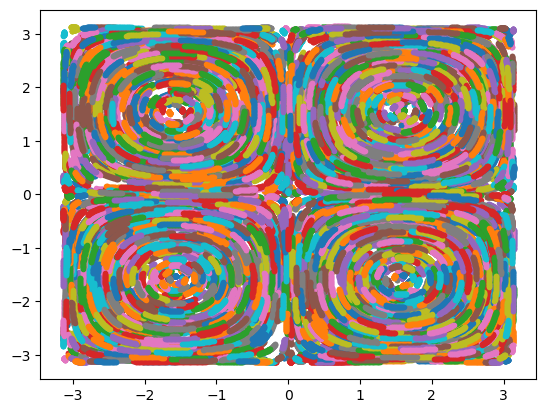

In [44]:
fig = plt.figure()
for i in range(positions.shape[0]):
    plt.plot(positions[i,:,0],positions[i,:,1],'.')
    
# plt.xlim([-np.pi,np.p])
# plt.ylim([0,1])

In [78]:
positions.shape

(5000, 41, 2)

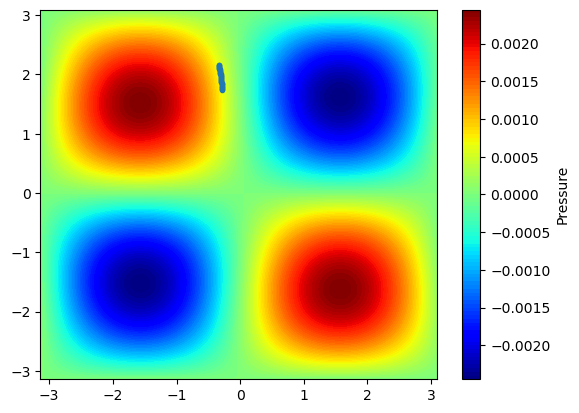

In [80]:
# Plot particle N
# Compute partial derivatives
dw_dx, dw_dy = np.gradient(v)
du_dx, du_dy = np.gradient(u)
# Compute vorticity
vorticity = dw_dx - du_dy

N = 14
fig = plt.figure()
plt.plot(positions[N,0:-1,0],positions[N,0:-1,1],'.')
# plt.contourf(x,y,p[-1,:,:].T,100,cmap='jet')
plt.contourf(x,y,vorticity.T,100,cmap='jet')
plt.colorbar(label="Pressure")
# plt.quiver(X, Z, u, v, color='k', scale=1, scale_units='xy')  # Overlay velocity vectors
# plt.xlim([-2,-1])
# plt.ylim([-2,-1])

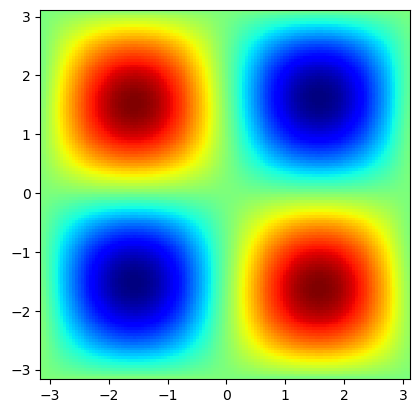

In [65]:
fig, ax = plt.subplots()
plt.axis('on')
xdata, ydata = [], []
ln, = ax.plot([], [], 'ob',markersize=5)
cont = ax.pcolormesh(x,y,vorticity.T/np.max(np.abs(vorticity)),cmap='jet')
def init():
    # ax.set_xlim(0, x[-1])
    # ax.set_ylim(0, y[-1])
    ax.set_aspect('equal')
    return ln,

def update(i):
    ln.set_data(positions[:,i,0], positions[:,i,1])
    cont.set_array(vorticity.T/np.max(np.abs(vorticity)))
    return ln,

ani = FuncAnimation(fig, update, frames=positions.shape[1]-1, init_func=init, blit=True)

In [66]:
from IPython.display import HTML
HTML(ani.to_jshtml())